In [2]:
using CairoMakie;
using DelimitedFiles, Statistics, Glob, LaTeXStrings, StatsBase, LinearAlgebra, SparseArrays, Distances, LazySets,  MultivariateStats;
using Measures: mm
include("final_analysis_library.jl");

In [3]:
#simulation params
L = 8
M = 100
B = 1;
nu = 0.005;
Delta = 4.;
F0 = 1.; 

K = 4
pk = 0.2

ncopies = 100
tini = 75
nsteps = 200
dt = 50

N = 128

folder = "../data/persistent/Delta$(Delta)_F0$(F0)_nu$(nu)_N$(N)_M$(M)_B1_L$(L)_pers0.0/half_fixed/long_K$(K)_pk$(pk)/";
sfolder = folder*"zeros/sample_1/"
fieldmatrix = readdlm(sfolder*"fieldmatrix.txt",header=true)[1][:,2:end];
        
means = mean(fieldmatrix,dims=1)
vars = var(fieldmatrix,dims=1);


ones/rand1/rand2/rand3/rand4/rand5/

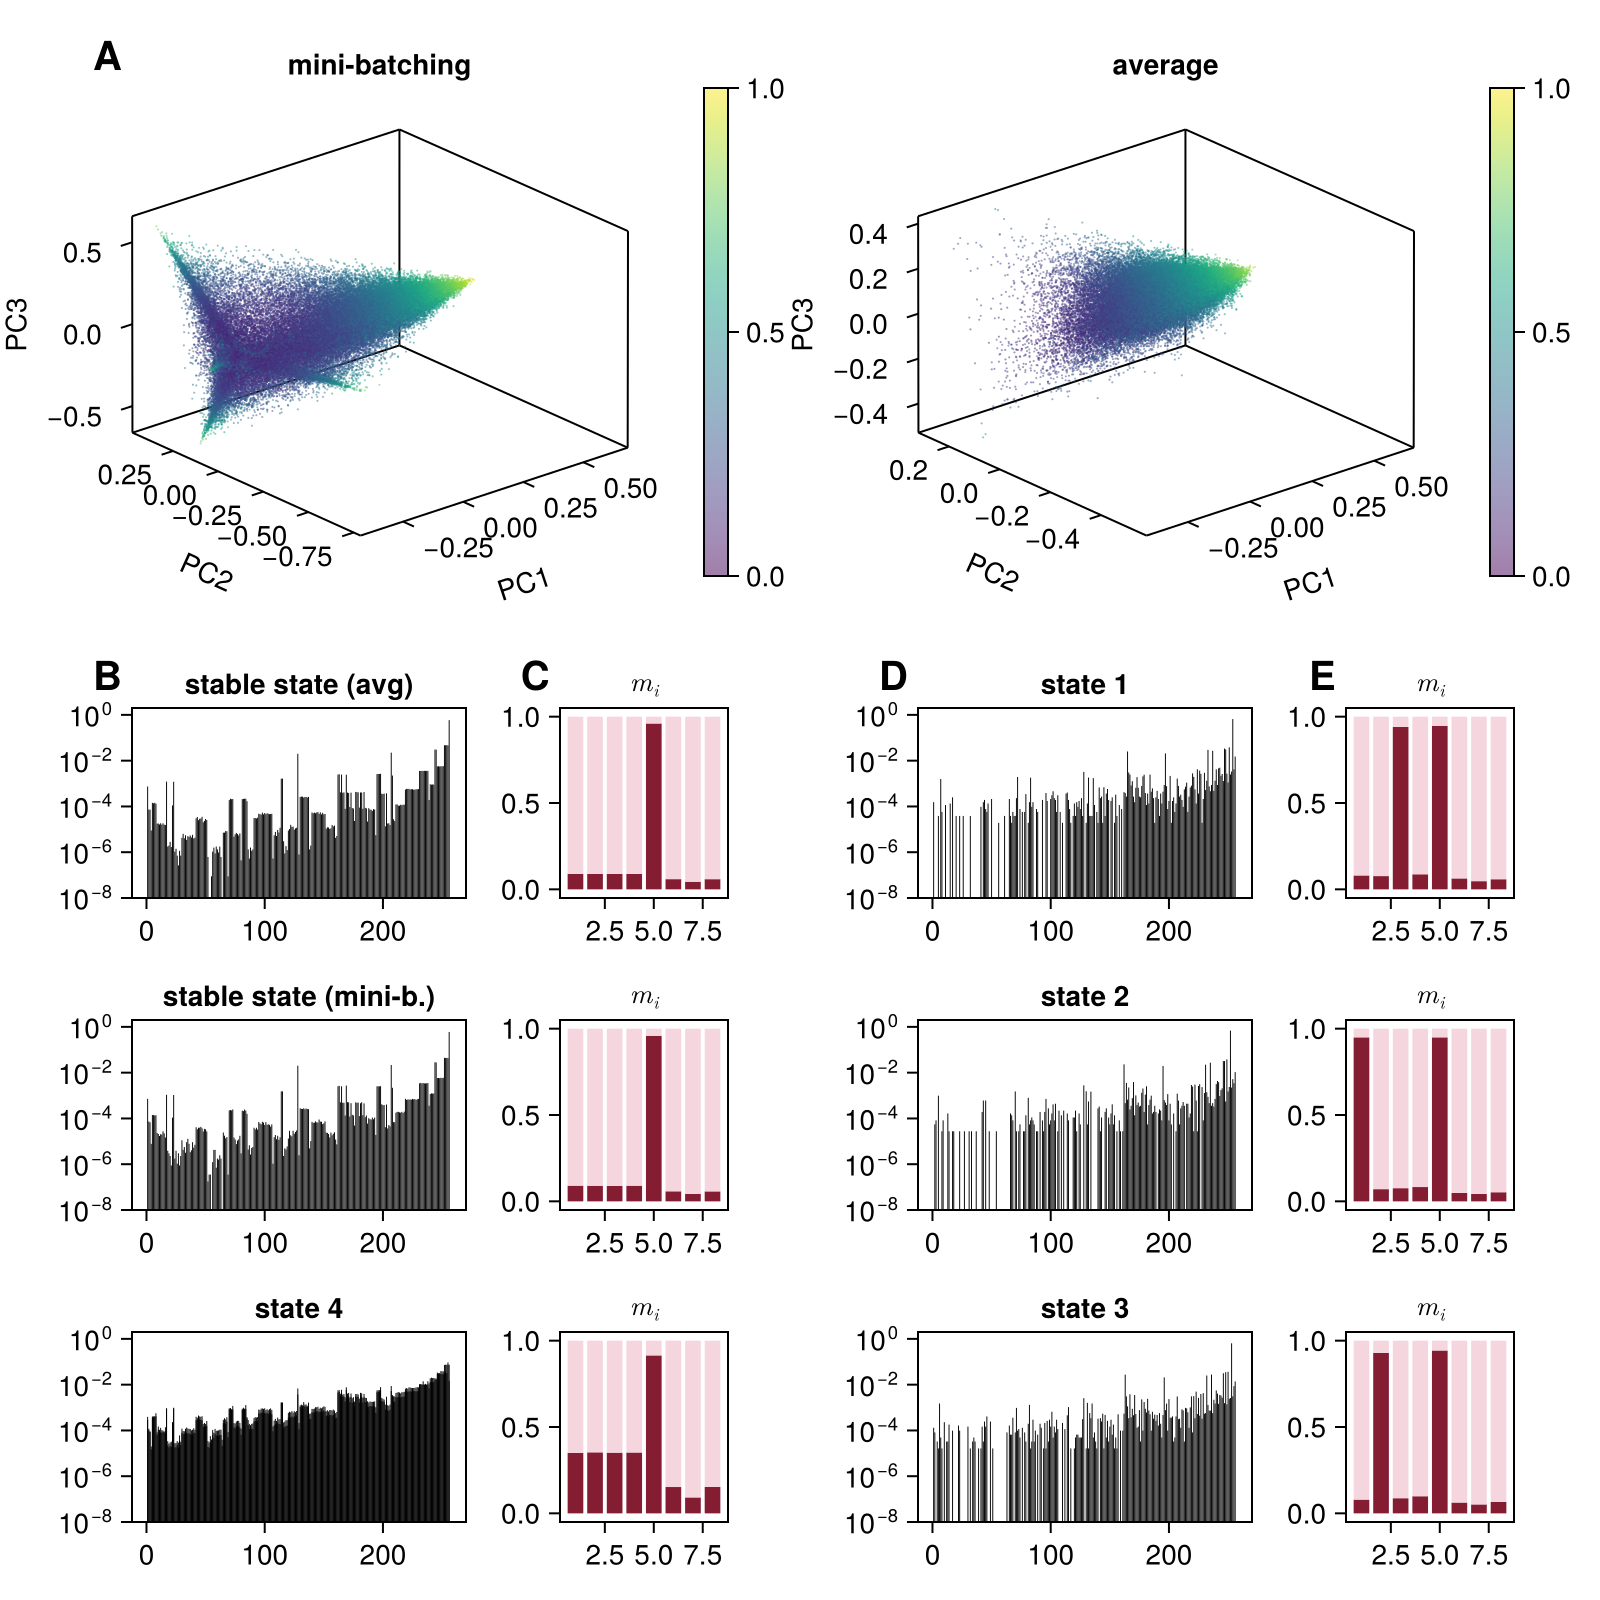

In [7]:
F,V,G = get_FVG(means,vars,L,K)

init="zeros/"

Xtr = get_muller_tot(folder*init,"saved_snaps/",ncopies,L,nsteps,tini,dt)./N
Ztr = get_muller_tot(folder*init,"saved_snaps_ref/",ncopies,L,nsteps,tini,dt)./N

P = fit(PCA, Xtr; maxoutdim=3)

Y = predict(P,Xtr);
Z = predict(P,Ztr);

Y1,Y2,Y3 = Y[1,:], Y[2,:], Y[3,:]
Z1,Z2,Z3 = Z[1,:], Z[2,:], Z[3,:]

p1 = [-0.4,-0.7,0.16]
p2 = [-0.4,0.4,0.6]
p3 = [-0.4,0.17,-0.6]
p4 = [-0.4,0,0]
d2eps = 0.05

perm = sortperm(F)

idmore = findall(x->x>0,Y[1,:])
idless = findall(x->x<=0, Y[1,:])
    
cnt_more = length(idmore)
cnt_less = length(idless)
Xmore = sum(Xtr[perm,idmore],dims=2)
Xless = sum(Xtr[perm,idless],dims=2)
Zmean = mean(Ztr[perm,:],dims=2)

cond1 = sum((p1.-Y).^2 ,dims=1)[1,:].<d2eps
cond2 = sum((p2.-Y).^2 ,dims=1)[1,:].<d2eps
cond3 = sum((p3.-Y).^2 ,dims=1)[1,:].<d2eps
cond4 = sum((p4.-Y).^2 ,dims=1)[1,:].<d2eps
id1 = findall(x->x,cond1)
id2 = findall(x->x,cond2)
id3 = findall(x->x,cond3)
id4 = findall(x->x,cond4)
cnt1 = length(id1)
cnt2 = length(id2)
cnt3 = length(id3)
cnt4 = length(id4)

X1 = sum(Xtr[perm,id1],dims=2)
X2 = sum(Xtr[perm,id2],dims=2)
X3 = sum(Xtr[perm,id3],dims=2)
X4 = sum(Xtr[perm,id4],dims=2)

IPR = get_ipr_traj(Xtr)
IPR_ref = get_ipr_traj(Ztr);

for init in append!(["ones/"],["rand$(i)/" for i in 1:5])
    print(init)
    Xtr = get_muller_tot(folder*init,"saved_snaps/",ncopies,L,nsteps,tini,dt)./N
    Y = predict(P,Xtr)
    append!(Y1,Y[1,:])
    append!(Y2,Y[2,:])
    append!(Y3,Y[3,:])
    Ztr = get_muller_tot(folder*init,"saved_snaps_ref/",ncopies,L,nsteps,tini,dt)./N
    Z = predict(P,Ztr)
    append!(Z1,Z[1,:])
    append!(Z2,Z[2,:])
    append!(Z3,Z[3,:])
    ipr = get_ipr_traj(Xtr)
    ipr_ref = get_ipr_traj(Ztr);
    append!(IPR,ipr)
    append!(IPR_ref,ipr_ref);
    idmore = findall(x->x>0,Y[1,:])
    idless = findall(x ->x<=0, Y[1,:])
    cnt_more += length(idmore)
    cnt_less += length(idless)
    Xmore .+= sum(Xtr[perm,idmore],dims=2)
    Xless .+= sum(Xtr[perm,idless],dims=2)
    Zmean .+= mean(Ztr[perm,:],dims=2)
    cond1 = sum((p1.-Y).^2 ,dims=1)[1,:].<d2eps
    cond2 = sum((p2.-Y).^2 ,dims=1)[1,:].<d2eps
    cond3 = sum((p3.-Y).^2 ,dims=1)[1,:].<d2eps
    cond4 = sum((p4.-Y).^2 ,dims=1)[1,:].<d2eps
    id1 = findall(x->x,cond1)
    id2 = findall(x->x,cond2)
    id3 = findall(x->x,cond3)
    id4 = findall(x->x,cond4)

    cnt1 += length(id1)
    cnt2 += length(id2)
    cnt3 += length(id3)
    cnt4 += length(id4)
    x1 = sum(Xtr[perm,id1],dims=2)
    x2 = sum(Xtr[perm,id2],dims=2)
    x3 = sum(Xtr[perm,id3],dims=2)
    x4 = sum(Xtr[perm,id4],dims=2)
    X1 .+= x1
    X2 .+= x2
    X3 .+= x3
    X4 .+= x4
#    drift, diff, diff_0 = Nproj_driff(Xtr,reF,reV,reG,nu,lap,Narr,v1)
#    drift_pc1 = vcat(drift_pc1,drift)
#    append!(T_pc1,diff)
#    append!(T_pc1_0,diff_0)
end


f = Figure(size=(800, 800))
g1 = f[1,1] = GridLayout()
g2 = f[1,2] = GridLayout()
gbc = f[2,1] = GridLayout()
gb = gbc[1,1] = GridLayout()
gc = gbc[1,2] = GridLayout()
gde = f[2,2] = GridLayout()
gd = gde[1,1] = GridLayout()
ge = gde[1,2] = GridLayout()

ax1 = Axis3(g1[1, 1], ygridvisible=false, xgridvisible=false, zgridvisible=false,protrusions=(50,20,20,20))
ax2 = Axis3(g2[1, 1], ygridvisible=false, xgridvisible=false, zgridvisible=false,protrusions=(50,20,20,20)) 
axbar1 = Axis(g1[1, 2], ygridvisible=false, xgridvisible=false)
axbar2 = Axis(g2[1, 2], ygridvisible=false, xgridvisible=false)
hidedecorations!(axbar1)
hidedecorations!(axbar2)
axb = [Axis(gb[i,1],ygridvisible=false,xgridvisible=false,yscale=log10,limits=(nothing,(10^(-8),2))) for i in 1:3]
axc = [Axis(gc[i,1],ygridvisible=false,xgridvisible=false) for i in 1:3]
axd = [Axis(gd[i,1],ygridvisible=false,xgridvisible=false,yscale=log10,limits=(nothing,(10^(-8),2))) for i in 1:3]
axe = [Axis(ge[i,1],ygridvisible=false,xgridvisible=false) for i in 1:3]

ax1.title ="mini-batching"
ax2.title ="average"

for i in 1:3
    axc[i].title = L"m_i"
    axe[i].title = L"m_i"
end

s1 = scatter!(ax1,[Point3f(Y1[k],Y2[k],Y3[k]) for k in 1:length(Y1)],alpha=0.5,markersize=1.5, color = IPR,colorrange=(0.,1.))
s2 = scatter!(ax2,[Point3f(Z1[k],Z2[k],Z3[k]) for k in 1:length(Z1)],alpha=0.5,markersize=1.5, color = IPR_ref,colorrange=(0.,1.))
cb1 = Colorbar(g1[1,2],s1)
cb2 = Colorbar(g2[1,2],s2)
for ax in [ax1,ax2]
    ax.xlabel = "PC1"
    ax.ylabel = "PC2"
    ax.zlabel = "PC3"
end

##################
# separate states
##################

axb[1].title = "stable state (avg)"
axb[2].title = "stable state (mini-b.)"
axb[3].title = "metastable state"

mZmean = Zmean[:,1]./7
push!(mZmean,10^(-8))
barplot!(axb[1], mZmean, color=:black)
mXmore = Xmore[:,1]./cnt_more
push!(mXmore,10^(-8))
barplot!(axb[2], mXmore, color=:black)
mXless = Xless[:,1]./cnt_less
push!(mXless,10^(-8))
barplot!(axb[3], mXless, color=:black)

axd[1].title = "state 1"
axd[2].title = "state 2"
axd[3].title = "state 3"

mX1 = X1[:,1]./cnt1
push!(mX1,10^(-8))
barplot!(axd[1], mX1, color = :black)
mX2 = X2[:,1]./cnt2
push!(mX2,10^(-8))
barplot!(axd[2], mX2, color = :black)
mX3 = X3[:,1]./cnt3
push!(mX3,10^(-8))   
barplot!(axd[3], mX3, color = :black)

axb[3].title = "state 4"
mX4 = X4[:,1]./cnt4
push!(mX4,10^(-8))   
barplot!(axb[3], mX4, color = :black)


mat = digits.(range(0,2^L-1),base=2,pad=L)
mat = mat[perm,:]
mat = mapreduce(permutedims, vcat, mat)

xp = mean(mat,dims=1,weights(reduce(vcat,Zmean)))[1,:]
barplot!(axc[1],vcat(range(1,8),range(1,8)), vcat(xp,1 .-xp), stack = Int.(ones(16)),
color=vcat(zeros(8),ones(8)),colormap = :valentine, gap=0.2)
xp = mean(mat,dims=1,weights(reduce(vcat,Xmore)))[1,:]
barplot!(axc[2],vcat(range(1,8),range(1,8)), vcat(xp,1 .-xp), stack = Int.(ones(16)),
color=vcat(zeros(8),ones(8)),colormap = :valentine, gap=0.2)
xp = mean(mat,dims=1,weights(reduce(vcat,Xless)))[1,:]
barplot!(axc[3],vcat(range(1,8),range(1,8)), vcat(xp,1 .-xp), stack = Int.(ones(16)),
color=vcat(zeros(8),ones(8)),colormap = :valentine, gap=0.2)

xp = mean(mat,dims=1,weights(reduce(vcat,X1)))[1,:]
barplot!(axe[1],vcat(range(1,8),range(1,8)), vcat(xp,1 .-xp), stack = Int.(ones(16)),
color=vcat(zeros(8),ones(8)),colormap = :valentine, gap=0.2)
xp = mean(mat,dims=1,weights(reduce(vcat,X2)))[1,:]
barplot!(axe[2],vcat(range(1,8),range(1,8)), vcat(xp,1 .-xp), stack = Int.(ones(16)),
color=vcat(zeros(8),ones(8)),colormap = :valentine, gap=0.2)
xp = mean(mat,dims=1,weights(reduce(vcat,X3)))[1,:]
barplot!(axe[3],vcat(range(1,8),range(1,8)), vcat(xp,1 .-xp), stack = Int.(ones(16)),
color=vcat(zeros(8),ones(8)),colormap = :valentine, gap=0.2)

rowsize!(f.layout, 1, Auto(0.6))
colsize!(gbc, 1, Auto(2))
colsize!(gde, 1, Auto(2))

for (label, layout) in zip(["A", "B", "C", "D", "E"], [g1, gb, gc, gd, ge])
    Label(layout[1, 1, TopLeft()], label,
        fontsize = 20,
        font = :bold,
        padding = (0, 5, 5, 0),
        halign = :right)
end

save("../data/plots/SI_PCA_states.pdf",f)
f

In [168]:
P

PCA(indim = 256, outdim = 3, principalratio = 0.6449302310471201)

Pattern matrix (unstandardized loadings):
─────────────────────────────────────────────
              PC1           PC2           PC3
─────────────────────────────────────────────
1     0.00654347    0.000414802  -0.000131247
2    -0.00181786   -0.00246213   -0.00355341
3    -0.00175499   -0.00110108    0.00360955
4    -0.00138815   -0.00062069    5.61865e-5
5    -0.00185599    0.00468665   -0.00102774
6    -0.00117688    0.000177362  -0.000691117
7    -0.00154234    0.000504382   0.000501361
8    -0.000863287  -4.86409e-5    2.21203e-5
9    -0.00168731   -0.000845013   0.000882352
10   -0.00144189   -0.00074687   -0.000621306
11   -0.00138015   -0.000277524   0.000750411
12   -0.000832809  -0.000259988  -8.09823e-5
13   -0.00142192    0.00053883   -3.3188e-6
14   -0.000845906   8.7702e-6    -0.000249287
15   -0.000859489   9.883e-6      0.000139484
16   -0.000692128  -0.000109556  -8.14034e-5
17    0.290766      0.0006